<a href="https://colab.research.google.com/github/gitaglra/Data-Modeling/blob/main/Decision%20Tree%20Classification%20for%20Bank%20Customer%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PREPARATION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **DATASET INFORMATION**

### 1. Import & Mounting Data

In [ ]:
#Import Packages
import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.style.use("fivethirtyeight")

In [ ]:
data_nasabah = pd.read_csv('/content/drive/MyDrive/colabbs/BankCustomerData(1).csv')
data_nasabah.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Terlihat bahwa data `Bank Customer Data` memiliki:

*   42639 baris dan 17 kolom.
*   7 Variabel Numerik, dan 
*   10 Variabel Kategorik.



### 2. The Data

In [ ]:
data_nasabah.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data_nasabah.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes
42638,32,management,single,tertiary,no,1962,no,no,cellular,13,jan,130,1,-1,0,unknown,no


### 3. Descriptive Statistics

In [ ]:
data_nasabah.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


### 4. Data Insights

In [ ]:
data_nasabah.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit'],
      dtype='object')

Diatas menunjukkan seluruh variabel dari data dan tipe data.

In [ ]:
data_nasabah.shape

(42639, 17)

Besar data adalah (42639 x 17)

In [ ]:
data_nasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


Bedasarkan info mengenai data diatas,  diketahui:
*   Terdapat 7 Variabel dengan Tipe Integer
*   Terdapat 10 Variabel dengan Tipe Object



## **EXPLORATORY DATA ANALYSIS**

**Data Dictionary**:

| Variable | Description | Data Type |
| -------- | ----------- | --------- |
| `Age` | numeric | - |
| `Job` | type of job | categorical ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| `Marital` | marital status |categorical ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) |
| `Education` | - | categorical ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') |
| `Default` | has credit in default? | categorical ('no','yes','unknown') |
| `Housing` | has housing loan | categorical ('no','yes','unknown') |
| `Loan` | has personal loan? | categorical ('no','yes','unknown') |
| `Contact` | contact communication type | categorical ('cellular','telephone') |
| `Month` |  last contact month of year | categorical ('jan', 'feb', 'mar', …, 'nov', 'dec') |
| `Day of Week` | last contact day of the week | categorical ('mon','tue','wed','thu','fri') |
| `Duration` | last contact duration, in seconds | numeric |
| `Campaign` | number of contacts performed during this campaign and for this client | numeric includes last contact |
| `Pdays` | number of days that passed by after the client was last contacted from a previous campaign | numeric; 999 means client was not previously contacted) |
| `Previous` | number of contacts performed before this campaign and for this client | numeric |
| `Poutcome` | poutcome (outcome of the previous marketing campaign) | categorical ('failure','nonexistent','success') |
| `Term_deposit` | has the client subscribed a term deposit? | binary ('yes','no') |

In [ ]:
#Membagi Variabel Numerik dan Kategorik
numerical_features = data_nasabah.select_dtypes(include = "number").columns.tolist()
categorical_features = data_nasabah.select_dtypes(include = "object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print()
print("Categorical features:")
pprint(categorical_features, compact = True)

Numerical features:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical features:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
 'month', 'poutcome', 'term_deposit']


### 1. Summary Statistics

In [ ]:
data_nasabah[categorical_features].describe().T

,count,unique,top,freq
job,42639,12,blue-collar,9536
marital,42639,3,married,25868
education,42639,4,secondary,22066
default,42639,2,no,41828
housing,42639,2,yes,24590
loan,42639,2,no,35554
contact,42639,3,cellular,27218
month,42639,12,may,13532
poutcome,42639,4,unknown,36085
term_deposit,42639,2,no,38678


In [ ]:
data_nasabah[numerical_features].describe().T #T berfungsi untuk transpose dataframe

,count,mean,std,min,25%,50%,75%,max
age,42639.0,40.788808,10.200236,18.0,33.0,39.0,48.0,95.0
balance,42639.0,1331.863951,3011.537676,-8019.0,62.0,429.0,1381.5,102127.0
day,42639.0,15.854781,8.293901,1.0,8.0,16.0,21.0,31.0
duration,42639.0,255.957504,258.361368,0.0,101.0,177.0,315.0,4918.0
campaign,42639.0,2.816412,3.163564,1.0,1.0,2.0,3.0,63.0
pdays,42639.0,34.169141,92.041713,-1.0,-1.0,-1.0,-1.0,536.0
previous,42639.0,0.465442,2.166705,0.0,0.0,0.0,0.0,275.0


Dari summary di atas:
* Seluruh Median dari variabel numerik, kecuali `day` lebih kecil daripada rata-rata nya, sehingga kemungkinan distribusinya left-skewed.
* Melalui nilai Q1 hingga Q3 dan nilai maksimum, dapat diperkirakan bahwa variabel `balance`, `duration`, dan `pdays` memiliki outlier yang banyak.


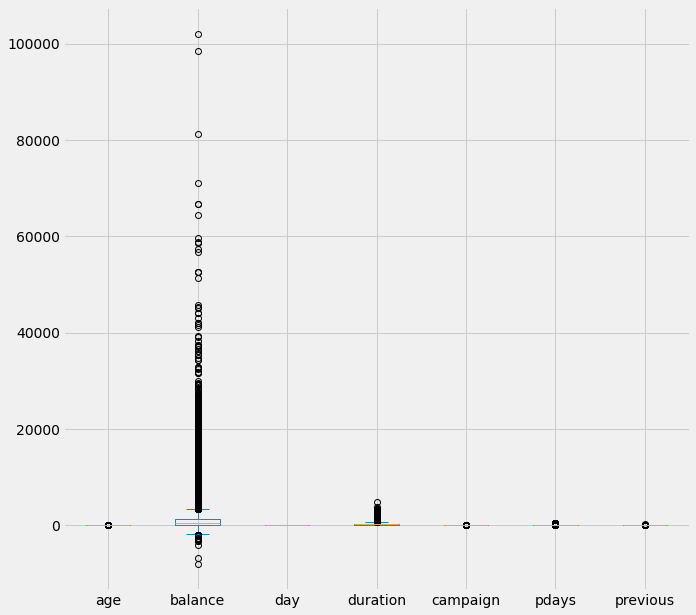

In [ ]:
#BOX PLOT
data_nasabah[numerical_features].plot(kind = "box", figsize=(10, 10))
plt.grid(True)
plt.show()

Dari visualisasi box plot di atas, diketahui:


*   Distribusi `balance` dan `duration` terlihat right-skewed.

Selain menggunakan boxplot seperti di atas, kita juga bisa menggunakan violin plot seperti di bawah ini untuk mengetahui bentuk kurva distribusi masing-masing fitur dengan lebih jelas



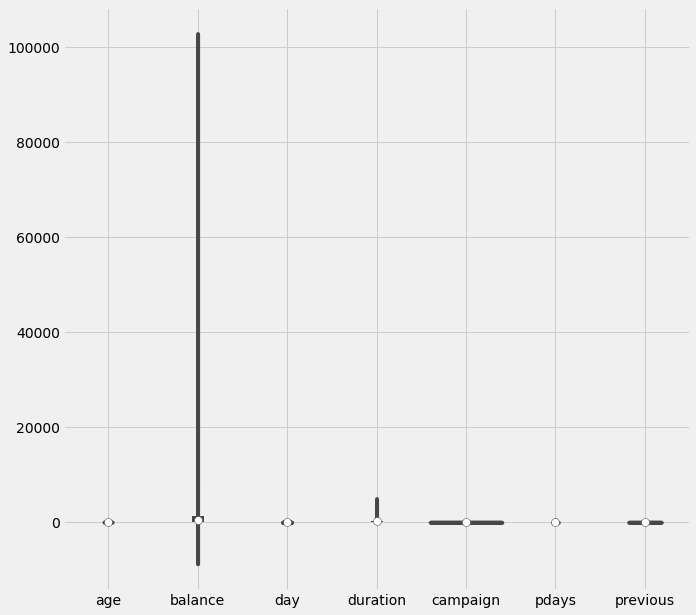

In [ ]:
#VIOLIN PLOT
plt.figure(figsize = (10, 10))
sns.violinplot(data = data_nasabah[numerical_features])
plt.grid(True)
plt.show()

### 2. Correlation

In [ ]:
#DATA FRAME CORRELATION
data_nasabah.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.088716,-0.009869,-0.016529,0.008296,-0.044165,-0.016279
balance,0.088716,1.000000,0.004696,0.016721,-0.013358,-0.006797,0.005194
day,-0.009869,0.004696,1.000000,-0.032557,0.165906,-0.101391,-0.048445
duration,-0.016529,0.016721,-0.032557,1.000000,-0.085640,-0.010812,-0.007730
campaign,0.008296,-0.013358,0.165906,-0.085640,1.000000,-0.079981,-0.024374
pdays,-0.044165,-0.006797,-0.101391,-0.010812,-0.079981,1.000000,0.450869
previous,-0.016279,0.005194,-0.048445,-0.007730,-0.024374,0.450869,1.000000


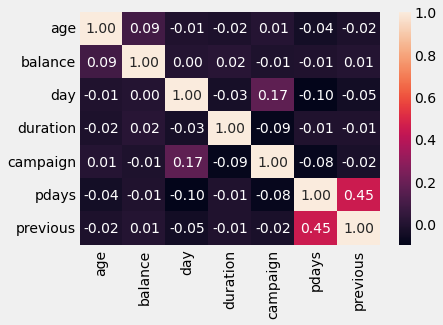

In [ ]:
#VISUALISASI KORELASI DENGAN HEATMAP
sns.heatmap(data_nasabah.corr(), annot = True, fmt = ".2f")
plt.show()

Dari 2 syntax diatas dapat dilihat bahwa korelasi tertinggi ditemukan pada:


*   Variabel `pdays` & `previous`
*   Variabel `day` & `campaign`
*   Variabel `balance` & `age`



### 3. EDA on Categorical Features

In [ ]:
data_nasabah[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,term_deposit
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


Berikut adalah data dari variabel kategorik, dengan:


*   Job (management, technician, etc.)
*   Marital (Married, Single, etc.)
*   Education (Tertiary, Secondary, etc.)
*   Default (No, Yes)
*   Housing (No, Yes)
*   Loan (No, Yes)
*   Housing (No, Yes)
*   Contact (Unknown, Cellular, etc.)
*   Month (Jan, Feb, etc.)
*   Poutcome (Success, Failure, etc.)
*   Term_Deposit (No, Yes)

### 4. Unique Values

**Number of Unique Values**

In [ ]:
data_nasabah[categorical_features].nunique()

job             12
marital          3
education        4
default          2
housing          2
loan             2
contact          3
month           12
poutcome         4
term_deposit     2
dtype: int64

.nunique() menampilkan jumlah nilai unik dari setiap baris, seperti:


*   Marital = 3 (`married`, `single`, `unknown`)
*   Loan = 2 (`Yes`, `No`), etc.





**Count of Unique Values**

In [ ]:
for feature in categorical_features :
    print(data_nasabah[feature].value_counts())

blue-collar      9536
management       8851
technician       7223
admin.           4810
services         4033
retired          1880
self-employed    1500
entrepreneur     1453
unemployed       1193
housemaid        1178
student           718
unknown           264
Name: job, dtype: int64
married     25868
single      11806
divorced     4965
Name: marital, dtype: int64
secondary    22066
tertiary     12302
primary       6581
unknown       1690
Name: education, dtype: int64
no     41828
yes      811
Name: default, dtype: int64
yes    24590
no     18049
Name: housing, dtype: int64
no     35554
yes     7085
Name: loan, dtype: int64
cellular     27218
unknown      12776
telephone     2645
Name: contact, dtype: int64
may    13532
jul     6587
aug     5987
jun     5128
nov     3895
apr     2718
feb     2296
jan     1224
oct      518
sep      282
mar      258
dec      214
Name: month, dtype: int64
unknown    36085
failure     4271
other       1517
success      766
Name: poutcome, dtype: int64
n

Output diatas menunjukkan jumlah dari nilai unik yang ada dari setiap baris, misal:


*   Nasabah dengan pekerjaan `management` sebanyak `8851`
*   Nasabah dengan status `married` sebanyak `25868`, etc.



### 5. Data Visualization

In [ ]:
#MEMBUAT FUNGSI VISUALISASI
def plot_count(x, data = data_nasabah, figsize=(20, 10)):
    column_order = data[x].value_counts().index

    plt.figure(figsize = figsize)
    sns.countplot(
        x = x, data = data, order = column_order
    )
    plt.grid(True)
    plt.show()

#### **JOB**

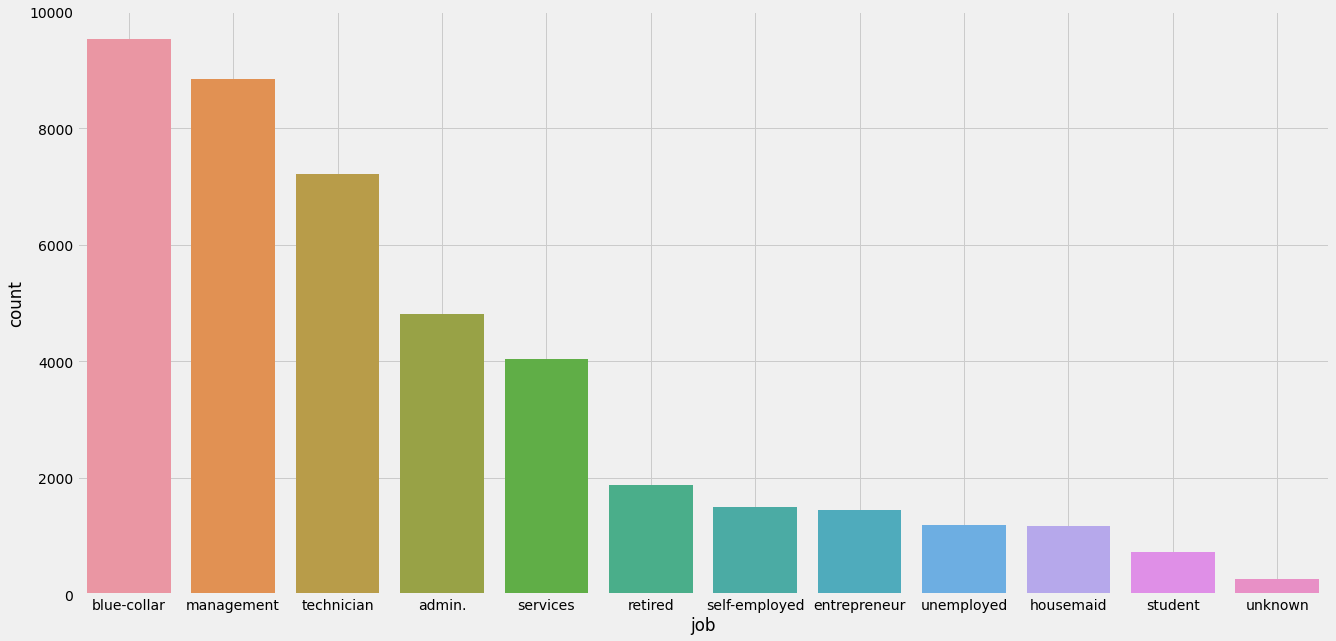

In [ ]:
job_order = data_nasabah["job"].value_counts().index
plot_count("job")

Dari visualisasi di atas, terlihat bahwa kategori pekerjaan umum dari nasabah bank adalah `blue-collar` diikuti `management`, `technician`, hingga `unknown`.

#### **MARITAL**

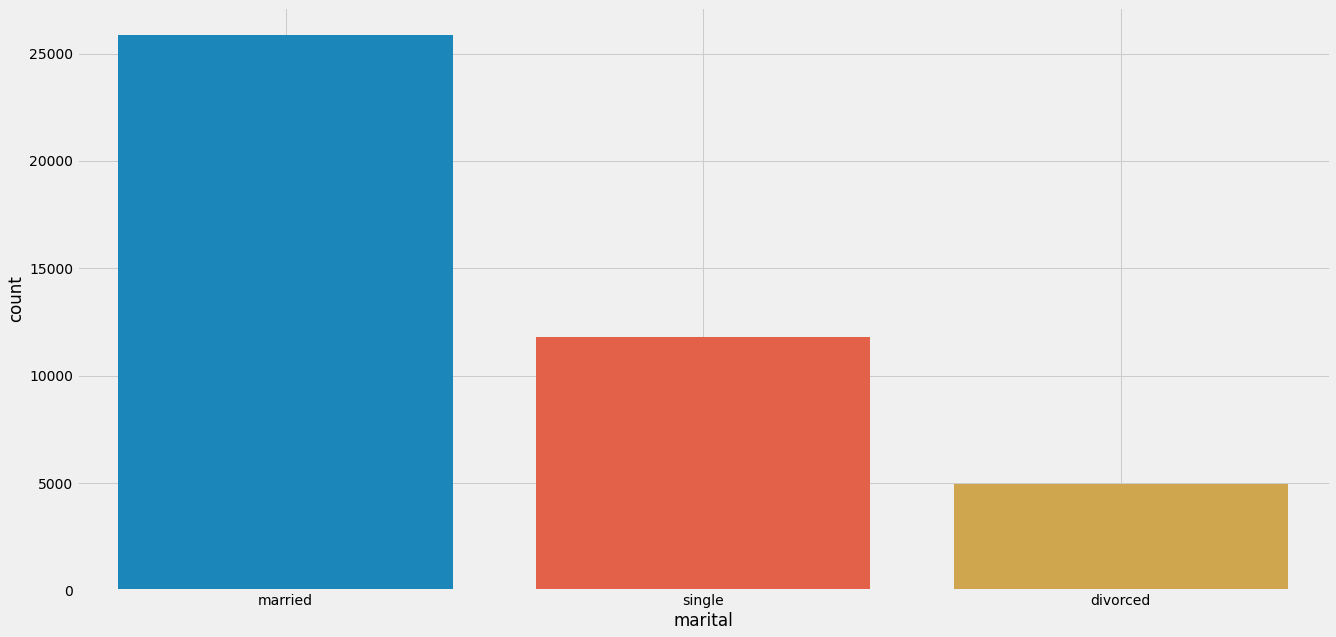

In [ ]:
marital_order = data_nasabah["marital"].value_counts().index
plot_count("marital")

Terlihat bahwa dari 3 kategori yang ada, `married` menjadi yang paling dominan. Sedangkan `divorced` berada diurutan terkahir.

#### **EDUCATION**

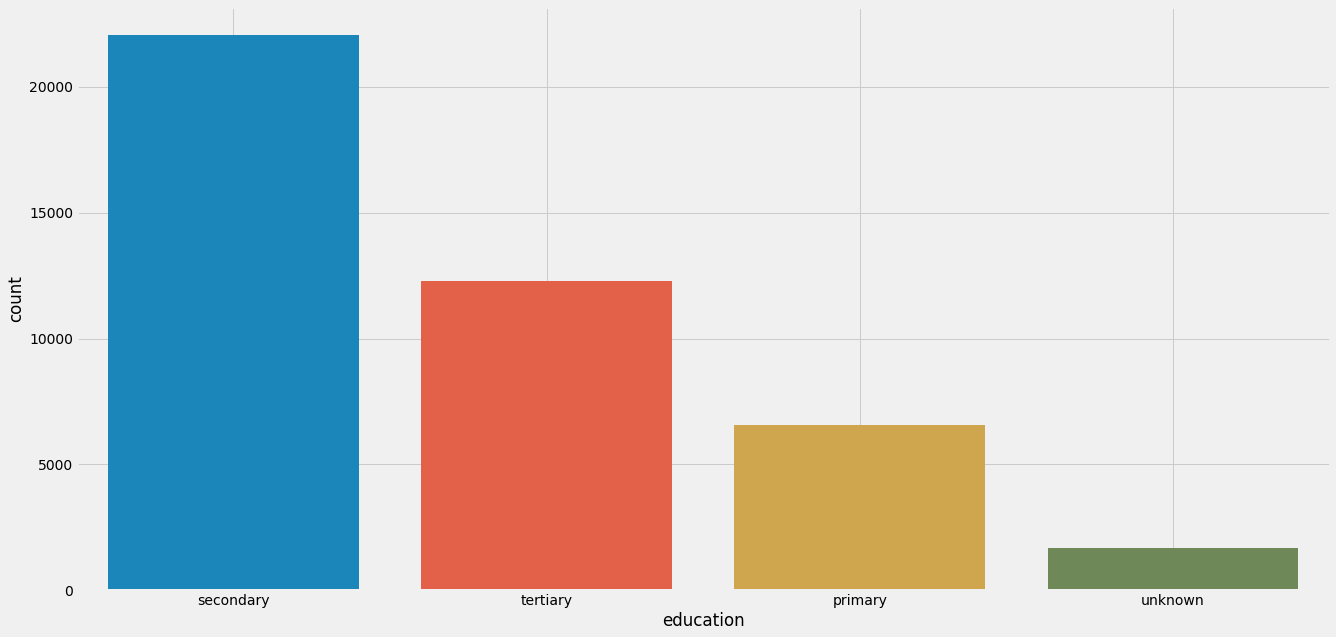

In [ ]:
education_order = data_nasabah["education"].value_counts().index
plot_count("education")

Terlihat bahwa pendidikan nasabah bank yang paling dominan adalah `secondary` diikuti oleh `tertiary` dan diakhiri dengan `unknown`.

#### **DEFAULT**

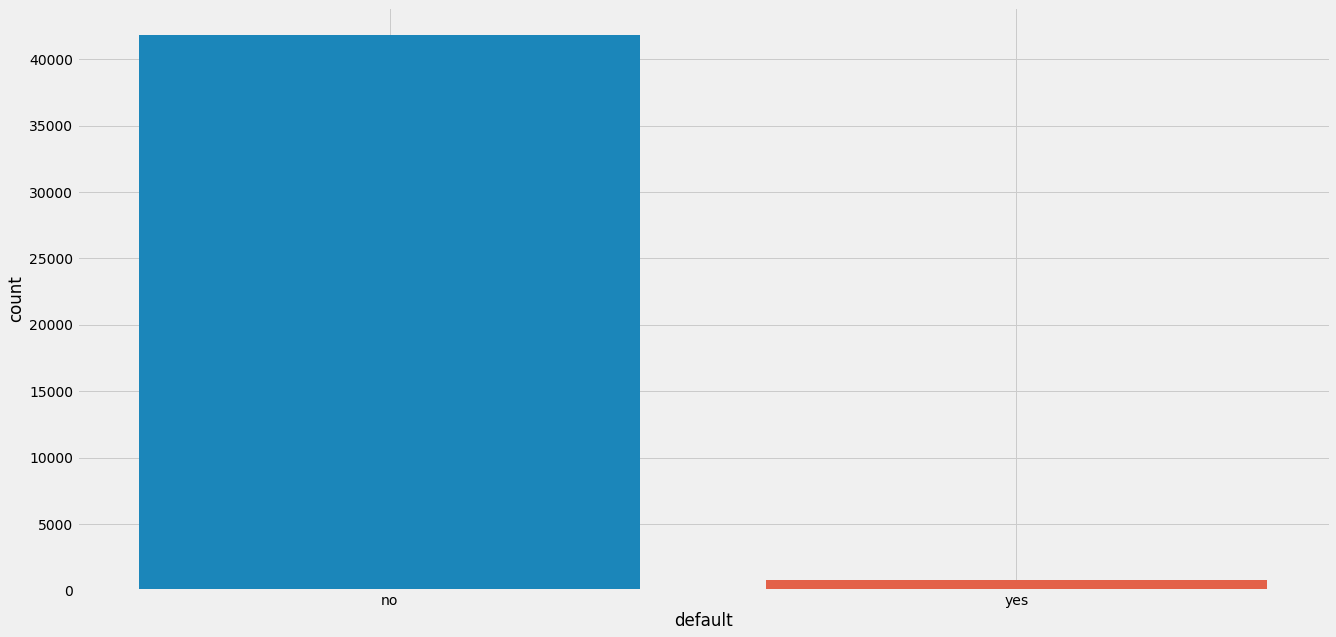

In [ ]:
default_order = data_nasabah["default"].value_counts().index
plot_count("default")

Terlihat bahwa nasabah bank yang dominan `tidak` memiliki kartu kredit bawaan.

#### **HOUSING**

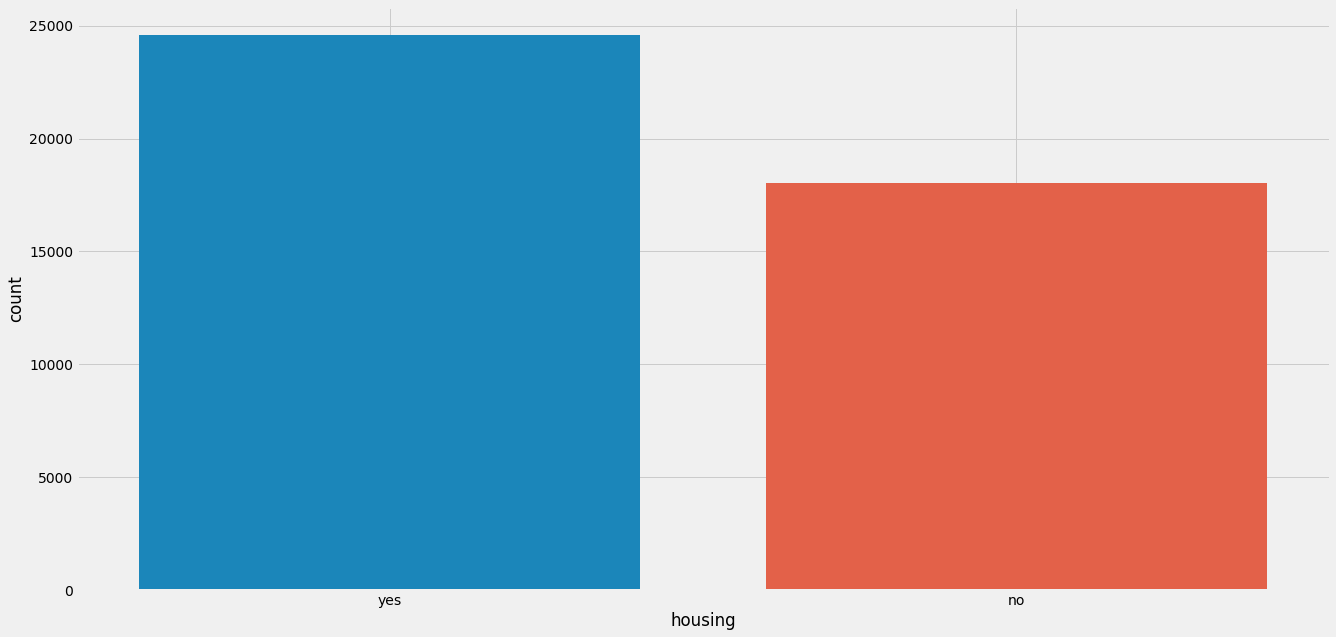

In [ ]:
housing_order = data_nasabah["housing"].value_counts().index
plot_count("housing")

Plot menunjukkan bahwa nasabah bank lebih dominan `memiliki pinjaman uang untuk rumah` dibandingkan yang tidak memiliki pinjaman uang untuk rumah.

#### **LOAN**

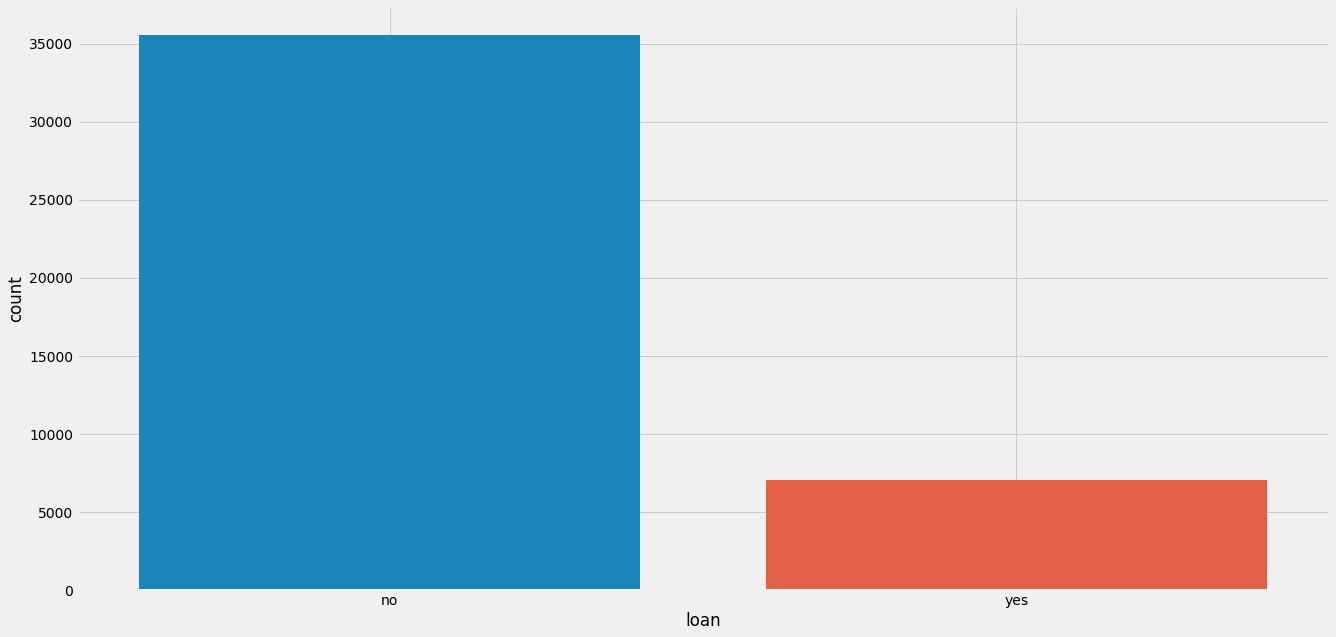

In [ ]:
loan_order = data_nasabah["loan"].value_counts().index
plot_count("loan")

Terlihat bahwa nasabah bank lebih dominan `tidak memiliki pinjaman pribadi` dibandingkan dengan memiliki pinjaman pribadi.

#### **CONTACT**

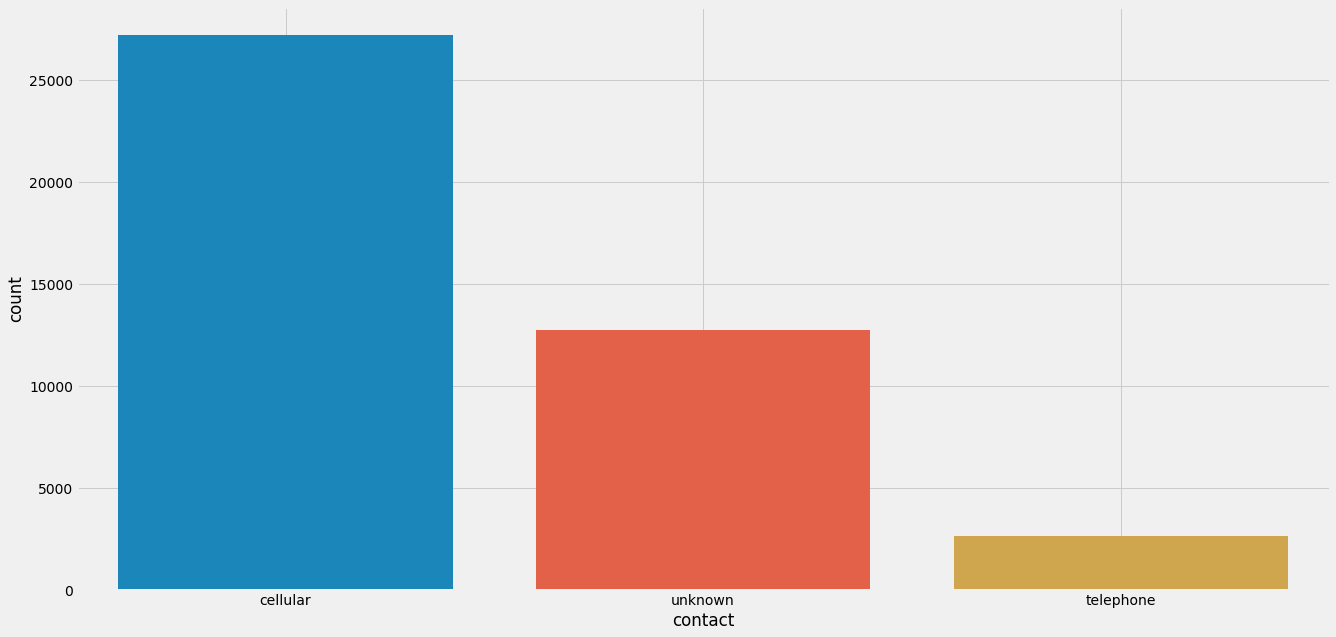

In [ ]:
contact_order = data_nasabah["contact"].value_counts().index
plot_count("contact")

Diketahui melalui plot diatas bahwa tipe kontak nasabah bank yang lebih dominan adalah `cellular` diikuti dengan `unknown` hingga `telephone`.

#### **MONTH**

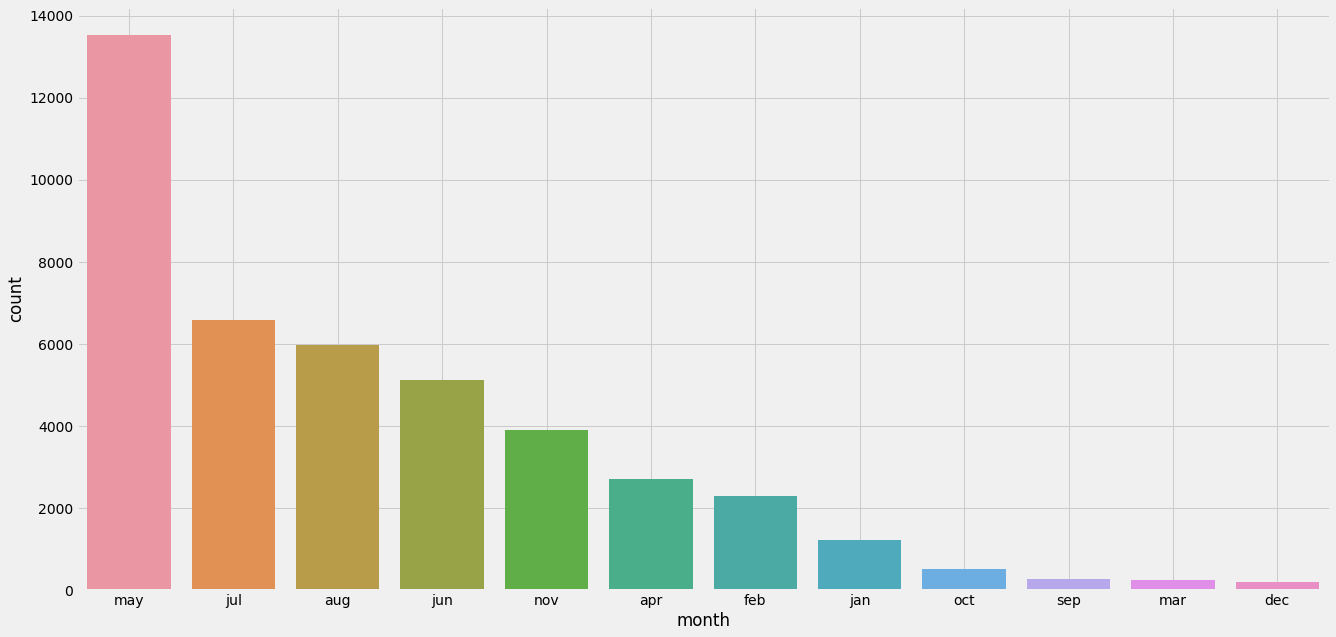

In [ ]:
month_order = data_nasabah["month"].value_counts().index
plot_count("month")

Melalui plot diatas diketahui bahwa bulan terakhir nasabah bank memiliki kontak dengan bank yang paling dominan adalah `may`, `july`, `august`, seterusnya hingga `december`.

#### **POUTCOME**

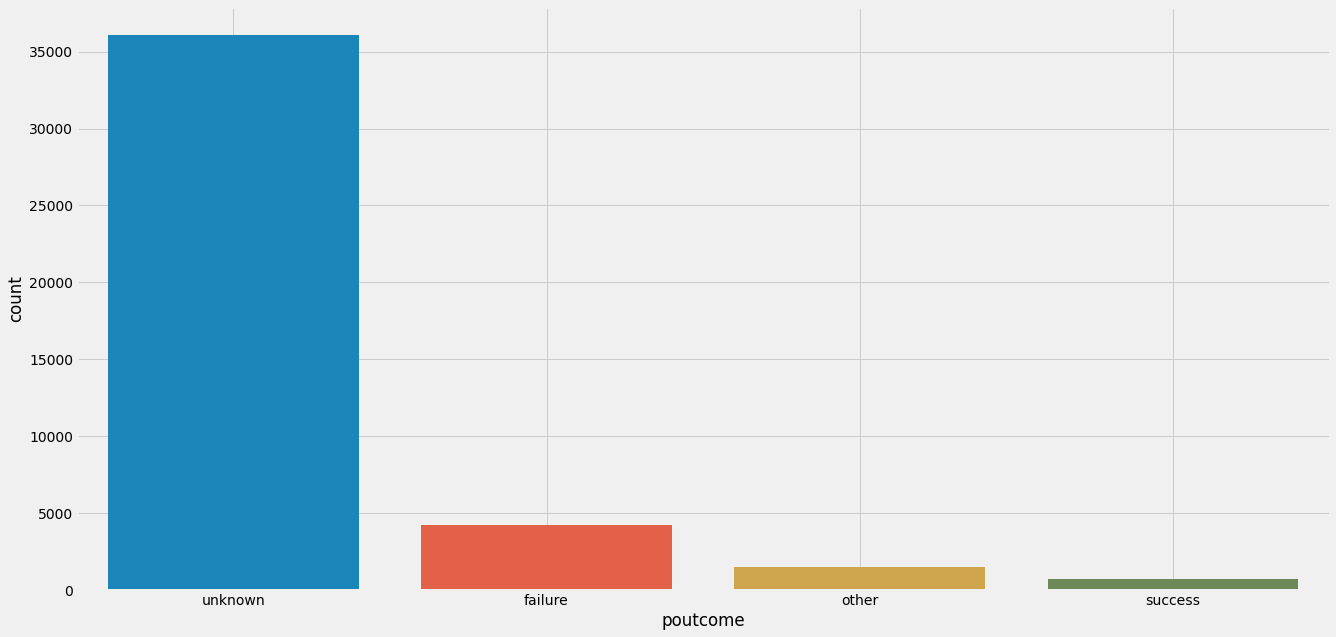

In [ ]:
poutcome_order = data_nasabah["poutcome"].value_counts().index
plot_count("poutcome")

Terlihat bahwa hasil dari kampanye marketing terkahir lebih dominan `unknown` dan `failure` dan sedikit `success`.

#### **TERM_DEPOSIT**

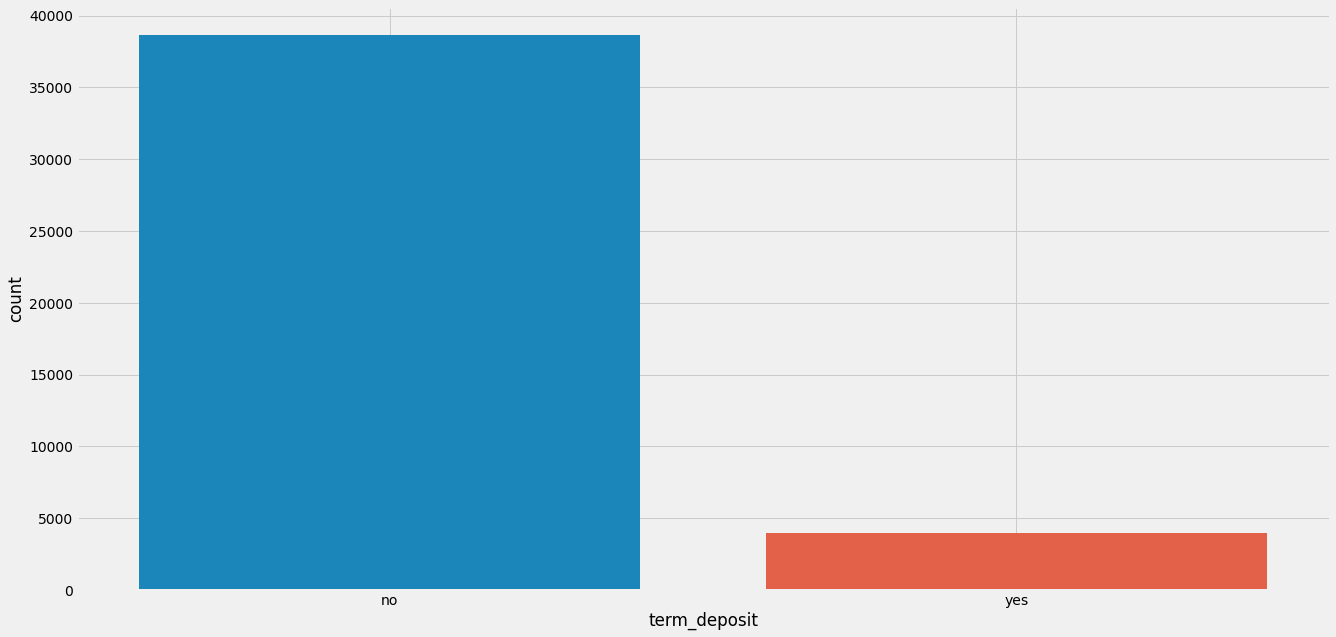

In [ ]:
term_deposit_order = data_nasabah["term_deposit"].value_counts().index
plot_count("term_deposit")

Terlihat bahwa lebih dominan nasabah bank yang `tidak berlangganan` deposito berjangka dibandingkan dengan berlangganan.

## **MODEL DEVELOPMENT**

In [ ]:
data_nasabah.head() #5 baris pertam dari dataset heart disease.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Untuk memudahkan proses training, kita akan buat variabel X yang berisi semua fitur-fitur untuk melatih model dan variabel y yang berisi target variabel

X = data_nasabah.drop(columns=["term_deposit"]).copy()
y = data_nasabah["term_deposit"].copy()

NameError: ignored

### Data Splitting

Seperti dijelaskan dalam slide, kita akan bagi dataset menjadi training, dev, dan test set dengan proporsi 99:0.5:0.5.

In [ ]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.1, stratify=y, random_state=11)
X_dev, X_test, y_dev, y_test = train_test_split(X_rest, y_rest, test_size=.5, stratify=y_rest, random_state=11)

print("training size:", X_train.shape[0])
print("dev size:", X_dev.shape[0])
print("test size:", X_test.shape[0])

training size: 38375
dev size: 2132
test size: 2132


Proporsi pembagian dataset sedikit berbeda dari biasanya (70:20:10 / 80:10:10 / dst.) dikarenakan ukuran dataset yang sangat besar, sehingga jumlah development dan test data sudah cukup dengan proporsi yang kecil (0.5%)

Diperoleh:


*   training size: 38375
*   dev size: 2132
*   test size: 2132





### Categorical Encoding

Fitur kategorik nominal, yaitu job, marital dan contact akan diubah menjadi matriks one-hot, sedangkan fitur kategorik ordinal (sisa fitur kategorik lainnya) akan diubah ke dalam bentuk angka terurut.

In [ ]:
nominal_features = ["job", "marital","contact"]
ordinal_features = X.select_dtypes(
    include="object"
).drop(columns=nominal_features).columns.tolist()

print("nominal features:", nominal_features)
print("ordinal features:")
pprint(ordinal_features, compact=True)

nominal features: ['job', 'marital', 'contact']
ordinal features:
['education', 'default', 'housing', 'loan', 'month', 'poutcome']


In [ ]:
onehot = OneHotEncoder()
onehot.fit(X_train[nominal_features])
X_train_onehot = pd.DataFrame(
    onehot.transform(X_train[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_dev_onehot = pd.DataFrame(
    onehot.transform(X_dev[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_test_onehot = pd.DataFrame(
    onehot.transform(X_test[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
print("one-hot matrix:")
display(X_train_onehot)

ordinal = OrdinalEncoder()
ordinal.fit(X_train[ordinal_features])
X_train_ordinal = pd.DataFrame(
    ordinal.transform(X_train[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_dev_ordinal = pd.DataFrame(
    ordinal.transform(X_dev[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_test_ordinal = pd.DataFrame(
    ordinal.transform(X_test[ordinal_features]),
    columns=ordinal.feature_names_in_
)
print("ordinal matrix:")
display(X_train_ordinal)

one-hot matrix:


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38370,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
38371,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
38372,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
38373,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


ordinal matrix:


,education,default,housing,loan,month,poutcome
0,0.0,0.0,0.0,0.0,6.0,3.0
1,1.0,0.0,1.0,0.0,8.0,3.0
2,0.0,0.0,1.0,1.0,8.0,3.0
3,3.0,0.0,1.0,0.0,8.0,3.0
4,1.0,0.0,1.0,1.0,8.0,3.0
...,...,...,...,...,...,...
38370,2.0,0.0,1.0,0.0,8.0,0.0
38371,0.0,0.0,1.0,0.0,8.0,3.0
38372,1.0,0.0,0.0,1.0,1.0,3.0
38373,1.0,0.0,1.0,0.0,8.0,3.0


### Data Rescaling

Kita akan menggunakan function StandardScaler dari scikit-learn sedemikian hingga nilai fitur-fitur numerik memiliki rata-rata 0 dan standar deviasi 1.

Tapi, sebelum itu, kita akan gabungan fitur numerik yang dengan fitur kategorik yang sudah diubah ke dalam bentuk numerik.

Perlu diperhatikan, untuk mencegah data leakage, kita akan melakukan fit pada data training saja.

Data leakage refers to a mistake make by the creator of a machine learning model in which they accidentally share information between the test and training data-sets (ref).

In [ ]:
X_train_combined = pd.concat(
    [X_train[numerical_features].reset_index(drop=True), X_train_onehot, X_train_ordinal],
    axis=1
)
X_dev_combined = pd.concat(
    [X_dev[numerical_features].reset_index(drop=True), X_dev_onehot, X_dev_ordinal],
    axis=1
)
X_test_combined = pd.concat(
    [X_test[numerical_features].reset_index(drop=True), X_test_onehot, X_test_ordinal],
    axis=1
)

X_train_combined.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,marital_single,contact_cellular,contact_telephone,contact_unknown,education,default,housing,loan,month,poutcome
0,60,415,18,49,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,3.0
1,31,1,20,71,3,-1,0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,8.0,3.0
2,46,357,19,221,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,8.0,3.0
3,60,54,5,221,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,8.0,3.0
4,33,2065,26,241,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,8.0,3.0


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_combined)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_combined),
    columns=X_train_combined.columns
)
X_dev_scaled = pd.DataFrame(
    scaler.transform(X_dev_combined),
    columns=X_dev_combined.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_combined),
    columns=X_test_combined.columns
)

with pd.option_context("display.max_columns", None):
    display(X_train_scaled.head())

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,education,default,housing,loan,month,poutcome
0,1.883808,-0.302122,0.261340,-0.801908,-0.257595,-0.382928,-0.211599,-0.355886,-0.536143,-0.188443,-0.167888,-0.513322,4.646161,-0.191535,-0.321700,-0.131468,-0.451660,-0.169278,-0.079829,-0.36374,0.807043,-0.619863,-1.332655,-0.256274,1.532611,-1.628493,-0.139545,-1.165232,-0.446507,0.163787,0.409354
1,-0.956823,-0.438592,0.502324,-0.716772,0.055942,-0.382928,-0.211599,-0.355886,-0.536143,-0.188443,-0.167888,-0.513322,-0.215231,-0.191535,-0.321700,-0.131468,2.214053,-0.169278,-0.079829,-0.36374,-1.239091,1.613261,-1.332655,-0.256274,1.532611,-0.290419,-0.139545,0.858198,-0.446507,0.835258,0.409354
2,0.512469,-0.321241,0.381832,-0.136300,-0.257595,-0.382928,-0.211599,-0.355886,-0.536143,-0.188443,-0.167888,1.948096,-0.215231,-0.191535,-0.321700,-0.131468,-0.451660,-0.169278,-0.079829,-0.36374,0.807043,-0.619863,-1.332655,-0.256274,1.532611,-1.628493,-0.139545,0.858198,2.239606,0.835258,0.409354
3,1.883808,-0.421121,-1.305057,-0.136300,-0.571131,-0.382928,-0.211599,-0.355886,1.865174,-0.188443,-0.167888,-0.513322,-0.215231,-0.191535,-0.321700,-0.131468,-0.451660,-0.169278,-0.079829,-0.36374,0.807043,-0.619863,-1.332655,-0.256274,1.532611,2.385729,-0.139545,0.858198,-0.446507,0.835258,0.409354
4,-0.760918,0.241778,1.225277,-0.058904,-0.257595,-0.382928,-0.211599,-0.355886,-0.536143,-0.188443,-0.167888,-0.513322,-0.215231,-0.191535,3.108486,-0.131468,-0.451660,-0.169278,-0.079829,-0.36374,0.807043,-0.619863,-1.332655,-0.256274,1.532611,-0.290419,-0.139545,0.858198,2.239606,0.835258,0.409354


### Modeling

Kita akan menggunakan DecisionTreeClassifier dari scikit-learn. Ada beberapa (hyper)parameter yang bisa kita tentukan saat mendefisinikan model.

Sebagai awalan, kita akan menggunakan default parameter yang disediakan oleh scikit-learn apa adanya.

In [ ]:
model_default = DecisionTreeClassifier(random_state=11)
model_default.fit(X_train_scaled, y_train)

preds_train = model_default.predict(X_train_scaled)
preds_dev = model_default.predict(X_dev_scaled)
preds_test = model_default.predict(X_test_scaled)

In [ ]:
print("train prediction samples:\n", preds_train[:20])
print("train target samples:\n", y_train[:20].tolist())

train prediction samples:
 ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no']
train target samples:
 ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no']


In [ ]:
print("dev prediction samples:\n", preds_dev[:10])
print("dev target samples:\n", y_dev[:10].tolist())

dev prediction samples:
 ['no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no']
dev target samples:
 ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [ ]:
print("test prediction samples:\n", preds_test[:10])
print("test target samples:\n", y_test[:10].tolist())

test prediction samples:
 ['no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes']
test target samples:
 ['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes']


Kita bisa membuat visualisasi model Decision Tree yang sudah dilatih supaya kita bisa melihat bagaimana model bisa melakukan prediksi dan fitur-fitur mana yang menjadi root node ataupun decision node.

karena kita menggunakan hyperparameter default model, proses visualisasi model mungkin akan memakan waktu yang cukup lama untuk seluruh level. Oleh karena itu, kita akan coba visualisasi 10 level pertama model saja.

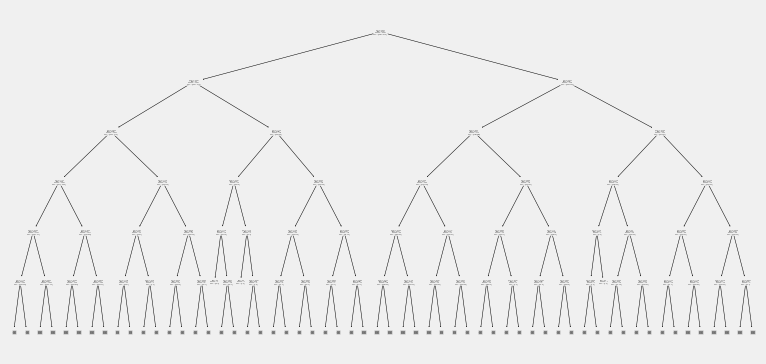

In [ ]:
# long running code with full depth
# plot_tree(model_default)
# plt.show()

plt.figure(figsize=(12, 6))
plot_tree(model_default, max_depth=5)
plt.show()

### Model Evaluation

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     34810
         yes       1.00      1.00      1.00      3565

    accuracy                           1.00     38375
   macro avg       1.00      1.00      1.00     38375
weighted avg       1.00      1.00      1.00     38375



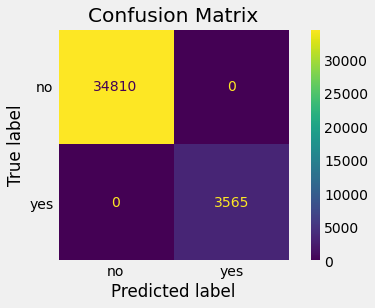

In [ ]:
print(classification_report(y_train, preds_train))

ConfusionMatrixDisplay.from_predictions(y_train, preds_train)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
34810 / (34810+0)

1.0

Insights yang diperoleh dari evaluasi model pada data training adalah:

*   semua evaluation metrics sangat bagus, mulai dari accuracy, precision, recall, dan f1-score
*   dari **3565 data yang berlabel Yes**, model gagal memprediksi **0 data dengan benar (false negative)**. Ini berarti, data nasabah yang didapat valid dan benar. 



              precision    recall  f1-score   support

          no       0.94      0.94      0.94      1934
         yes       0.41      0.38      0.40       198

    accuracy                           0.89      2132
   macro avg       0.67      0.66      0.67      2132
weighted avg       0.89      0.89      0.89      2132



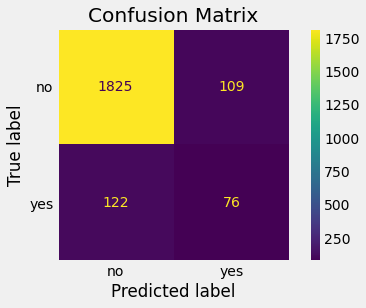

In [ ]:
print(classification_report(y_dev, preds_dev))

ConfusionMatrixDisplay.from_predictions(y_dev, preds_dev)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [ ]:
1825 / (1825+122)

0.9373394966615306

              precision    recall  f1-score   support

          no       0.95      0.92      0.93      1934
         yes       0.39      0.48      0.43       198

    accuracy                           0.88      2132
   macro avg       0.67      0.70      0.68      2132
weighted avg       0.89      0.88      0.89      2132



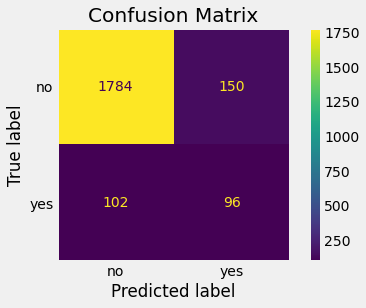

In [ ]:
print(classification_report(y_test, preds_test))

ConfusionMatrixDisplay.from_predictions(y_test, preds_test)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

Insights apa yang bisa diambil dari evaluasi model dengan data test di atas? adalah bahwa data nasabah yang di tampilkan itu benar, dan tidak ada kesalahan.

In [ ]:
1784 / (1784+102)

0.9459172852598091

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [ ]:
ordinal.feature_names_in_.tolist()

['education', 'default', 'housing', 'loan', 'month', 'poutcome']

In [ ]:
numerical_features + onehot.get_feature_names_out().tolist() + ordinal.feature_names_in_.tolist()

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome']

In [ ]:
column_names = (
    numerical_features
    + onehot.get_feature_names_out().tolist()
    + ordinal.feature_names_in_.tolist()
)
X_processed = pd.concat(
    [
     # numerical features
     X[numerical_features].reset_index(drop=True),
     # one-hot encoded features
     pd.DataFrame(
         onehot.transform(X[nominal_features]).toarray(),
         columns=onehot.get_feature_names_out().tolist()
     ),
     # ordinal encoded features
     pd.DataFrame(
         ordinal.transform(X[ordinal_features]),
         columns=ordinal.feature_names_in_.tolist()
     ),
    ],
    axis=1
)
X_processed_scaled = pd.DataFrame(
    scaler.transform(X_processed),
    columns=X_processed.columns
)

print("Predicting all {} data..".format(X_processed_scaled.shape[0]))
preds_full = model_default.predict(X_processed_scaled)

print("Combine the prediction back to the original data..")
X = X.assign(prediction=preds_full)

print("Overview of the resulting data..")
with pd.option_context("display.max_columns", None):
    display(X.head())

print("Export to CSV..")
X.to_csv("prediction.csv", index=False)

print("Done!")

Predicting all 42639 data..
Combine the prediction back to the original data..
Overview of the resulting data..


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,prediction
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Export to CSV..
Done!
